In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import tree

df = pd.read_excel('eBayAuctions.xls',sheet_name='Data')
df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
1,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
2,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
3,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
4,Music/Movie/Game,US,3249,5,Mon,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,Automotive,US,2992,5,Sun_Fri,359.95,359.95,0
1968,Automotive,US,21,5,Sat,610.00,300.00,1
1969,Automotive,US,1400,5,Mon,549.00,549.00,0
1970,Automotive,US,57,7,Sun_Fri,820.00,650.00,1


In [3]:
df.isna().any()

Category        False
currency        False
sellerRating    False
Duration        False
endDay          False
ClosePrice      False
OpenPrice       False
Competitive?    False
dtype: bool

In [4]:
# Checking class balance
df['Competitive?'].value_counts()

1    1066
0     906
Name: Competitive?, dtype: int64

In [5]:
# Categorical data Encoding
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

df[['Category','currency','Duration','endDay']] = enc.fit_transform(df[['Category','currency','Duration','endDay']])
df

,Category,currency,sellerRating,Duration,endDay,ClosePrice,OpenPrice,Competitive?
0,11.0,2.0,3249,2.0,0.0,0.01,0.01,0
1,11.0,2.0,3249,2.0,0.0,0.01,0.01,0
2,11.0,2.0,3249,2.0,0.0,0.01,0.01,0
3,11.0,2.0,3249,2.0,0.0,0.01,0.01,0
4,11.0,2.0,3249,2.0,0.0,0.01,0.01,0
...,...,...,...,...,...,...,...,...
1967,1.0,2.0,2992,2.0,2.0,359.95,359.95,0
1968,1.0,2.0,21,2.0,1.0,610.00,300.00,1
1969,1.0,2.0,1400,2.0,0.0,549.00,549.00,0
1970,1.0,2.0,57,3.0,2.0,820.00,650.00,1


In [10]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X = df.iloc[:, 0:7]
y = df.iloc[:,-1]
#X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']] = sc.fit_transform(X[['Balance','Qual_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Online_12']])

# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 22,shuffle = True)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       375
           1       0.84      0.84      0.84       414

    accuracy                           0.83       789
   macro avg       0.83      0.83      0.83       789
weighted avg       0.83      0.83      0.83       789



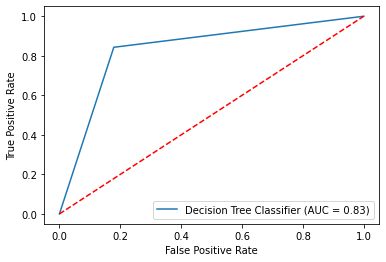

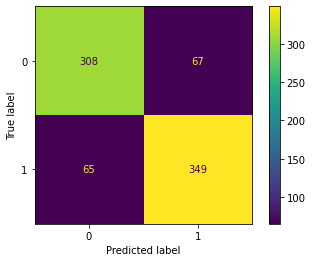

In [14]:
#Decision Tree Classifier
dtclf = DecisionTreeClassifier(random_state = 12,min_samples_leaf = 50) 
dtclf = dtclf.fit(X_train,y_train)
y_pred = dtclf.predict(X_test)
print(classification_report(y_test, y_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred,drop_intermediate=False)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Decision Tree Classifier')
display.plot()  # doctest: +SKIP
plt.plot([0, 1], [0, 1],'r--')
plt.show() 
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(cm,display_labels=[0,1]).plot()

[Text(0.35, 0.9375, 'OpenPrice <= 2.449\ngini = 0.495\nsamples = 1183\nvalue = [531, 652]\nclass = 1'),
 Text(0.15, 0.8125, 'ClosePrice <= 2.025\ngini = 0.299\nsamples = 409\nvalue = [75, 334]\nclass = 1'),
 Text(0.1, 0.6875, 'OpenPrice <= 1.228\ngini = 0.414\nsamples = 106\nvalue = [75, 31]\nclass = 0'),
 Text(0.05, 0.5625, 'gini = 0.495\nsamples = 51\nvalue = [23, 28]\nclass = 1'),
 Text(0.15, 0.5625, 'gini = 0.103\nsamples = 55\nvalue = [52, 3]\nclass = 0'),
 Text(0.2, 0.6875, 'gini = 0.0\nsamples = 303\nvalue = [0, 303]\nclass = 1'),
 Text(0.55, 0.8125, 'ClosePrice <= 10.0\ngini = 0.484\nsamples = 774\nvalue = [456, 318]\nclass = 0'),
 Text(0.35, 0.6875, 'OpenPrice <= 4.919\ngini = 0.371\nsamples = 345\nvalue = [260, 85]\nclass = 0'),
 Text(0.25, 0.5625, 'ClosePrice <= 4.06\ngini = 0.488\nsamples = 147\nvalue = [85, 62]\nclass = 0'),
 Text(0.2, 0.4375, 'gini = 0.225\nsamples = 93\nvalue = [81, 12]\nclass = 0'),
 Text(0.3, 0.4375, 'gini = 0.137\nsamples = 54\nvalue = [4, 50]\nclass 

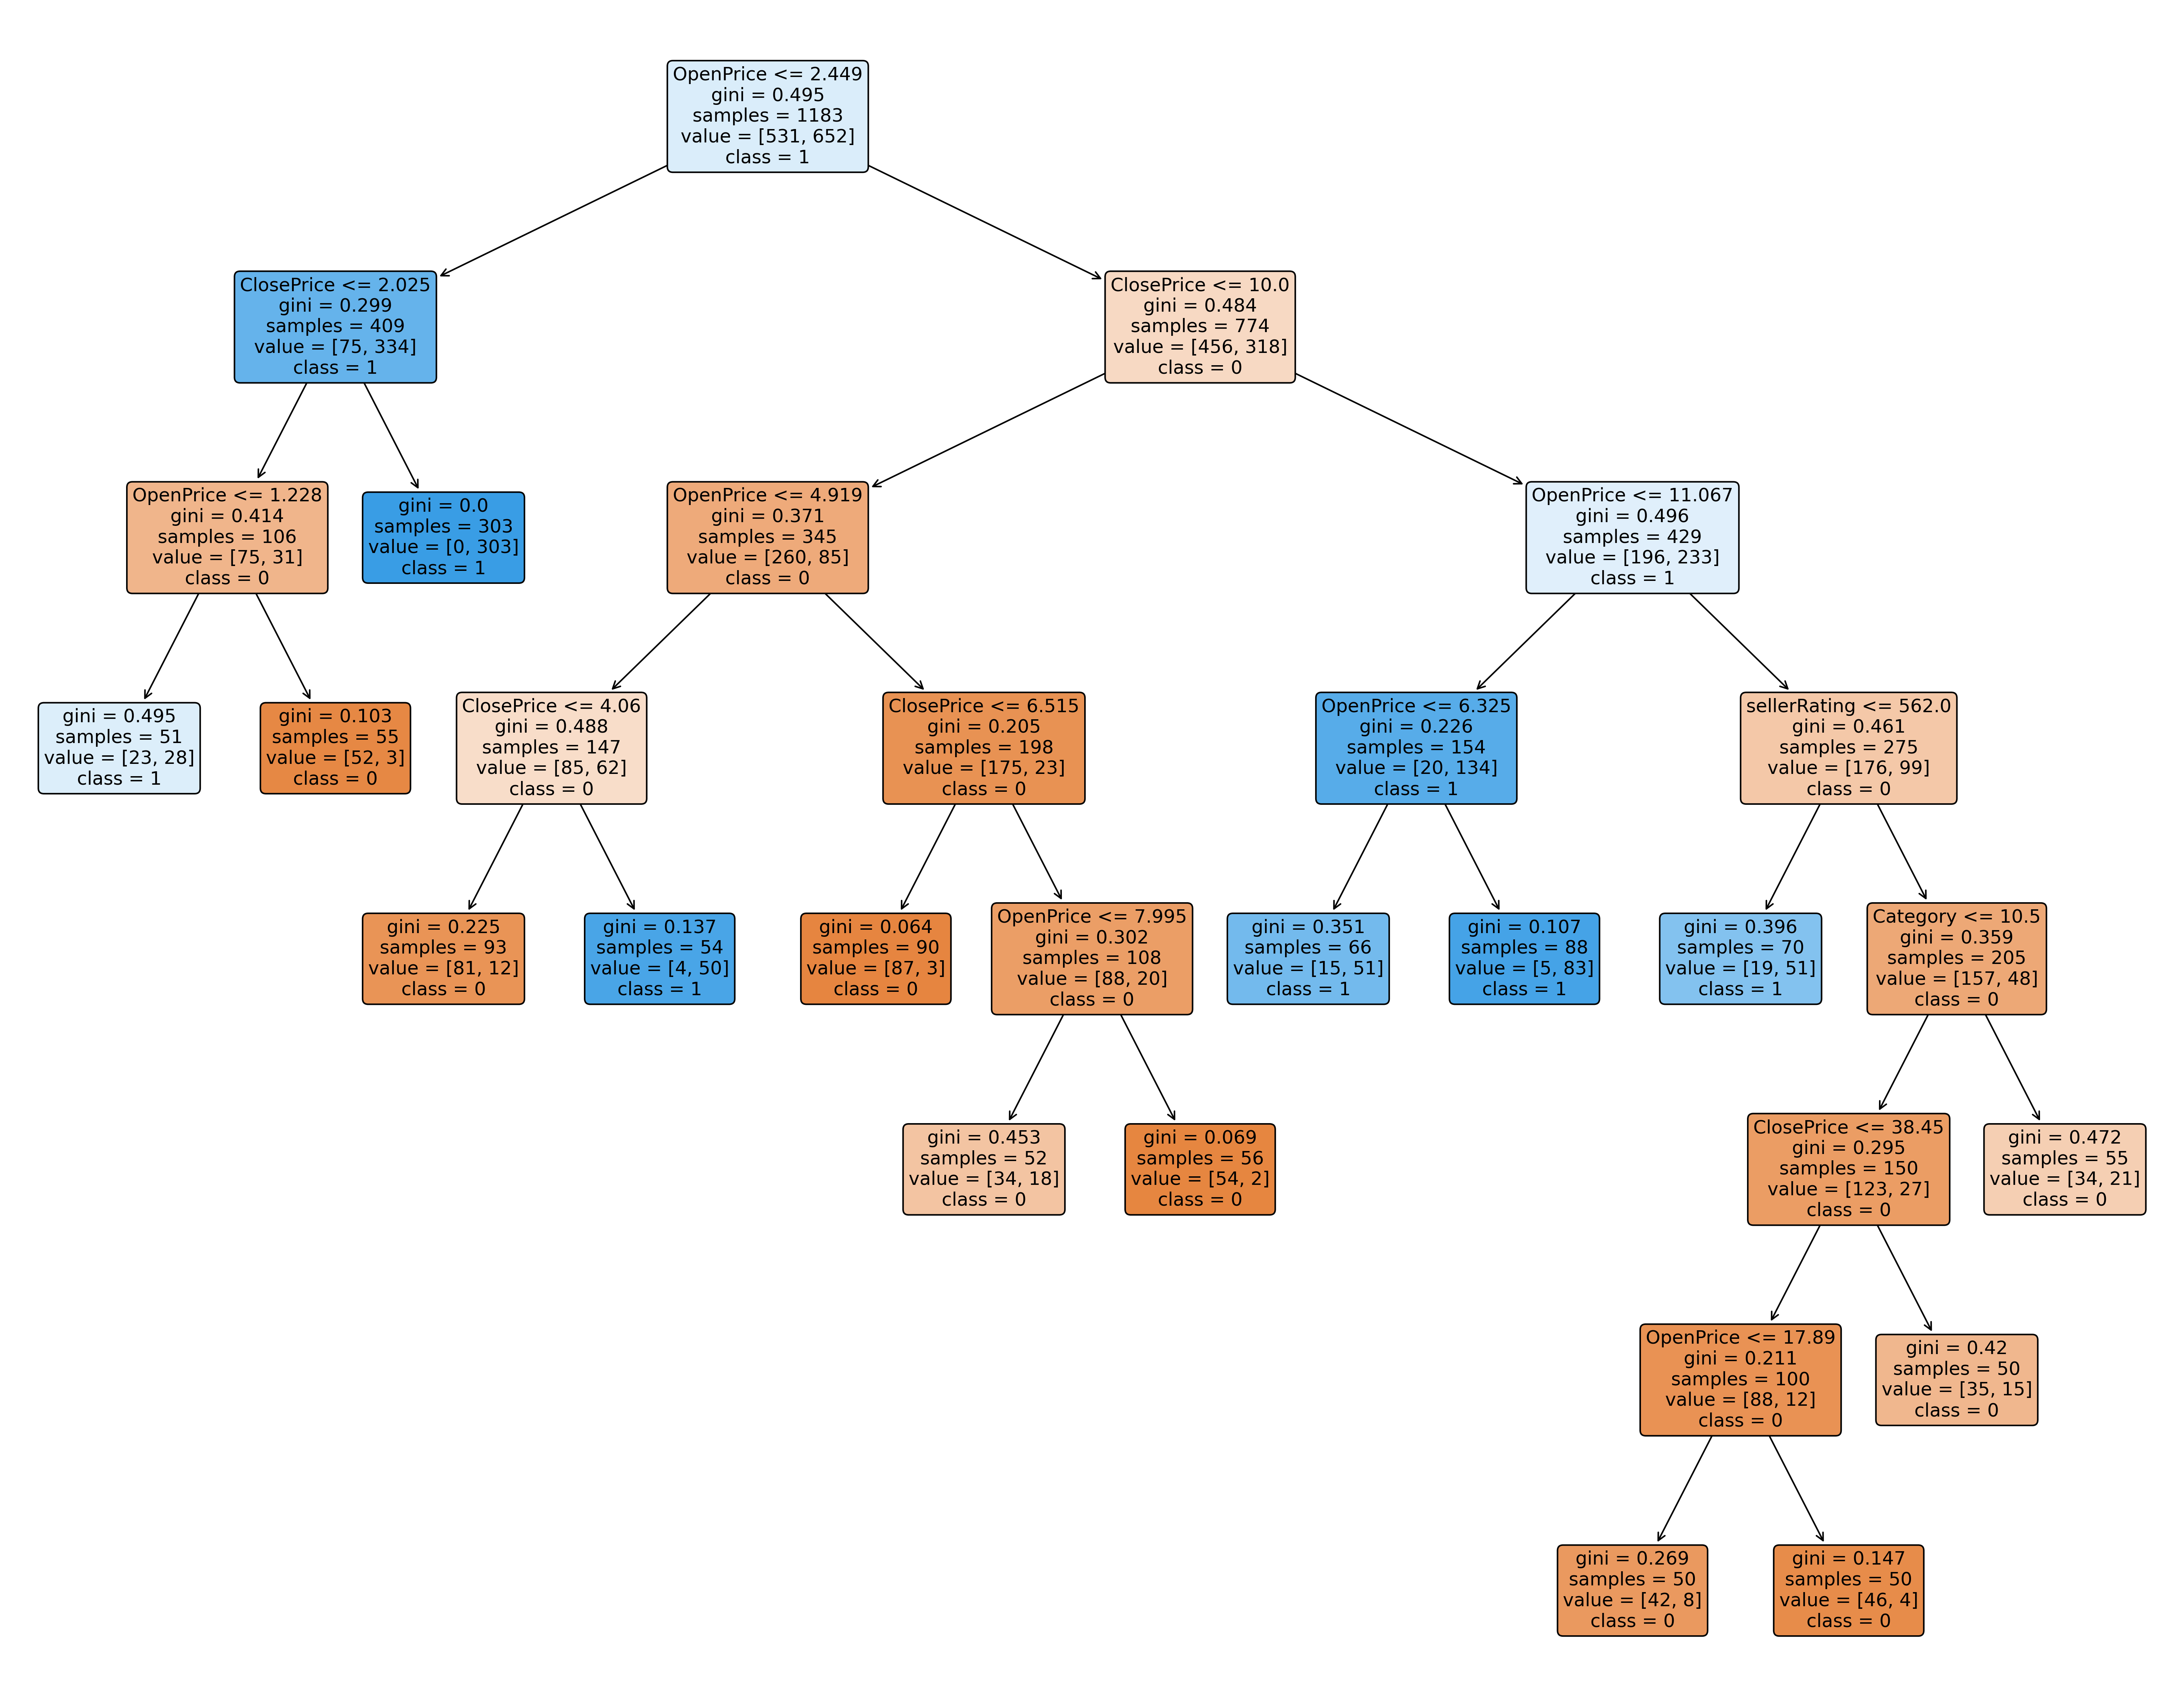

In [15]:
from sklearn import tree

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,20), dpi=300)
tree.plot_tree(dtclf, 
                   feature_names=X_train.columns,  
                   class_names=['0','1'],
                   rounded=True,
                   impurity = True,
                   filled=True)